# EDA

In [125]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Create dataframes

In [2]:
df = pd.read_csv('../data/silvercar_reservations.csv')
df_users = pd.read_csv('../data/silvercar_users.csv')
df_promos = pd.read_csv('../data/silvercar_promotions.csv', encoding="ISO-8859-1")
df_promo_codes = pd.read_csv('../data/silvercar_promo_codes.csv', encoding="ISO-8859-1")
df_locs = pd.read_csv('../data/silvercar_locations.csv', encoding="ISO-8859-1")

#### Change pandas and numpy display for interpretability

In [3]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions.float_format = '{:.2f}'.format

In [4]:
df.head()

,id,pickup,dropoff,user_id,status,confirmation_token,created_at,updated_at,booked_price,current_state,...,publisher_id,cancelled_at,local_rental,booked_by_id,awards_referral_bonus,extole_conversion_id,potential_local_rental,claimed_at,customer_modifiable,credit_card_id
0,89,41288.29,41289.40,12.00,nan,5B23231DC0,41269.81,41417.80,nan,cancelled,...,NaN,nan,0,nan,0,nan,nan,nan,1,nan
1,91,41307.79,41308.79,49.00,nan,9A10C66F0C,41269.85,41417.80,nan,cancelled,...,NaN,nan,0,nan,0,nan,nan,nan,1,nan
2,93,41297.42,41310.83,51.00,nan,157C8653CA,41269.87,41417.80,nan,cancelled,...,NaN,nan,0,nan,0,nan,nan,nan,1,nan
3,94,41291.54,41293.83,45.00,nan,C48194AA4F,41269.91,41417.80,nan,cancelled,...,NaN,nan,0,nan,0,nan,nan,nan,1,nan
4,95,41290.98,41291.79,55.00,nan,AABEB48B94,41269.94,41702.08,nan,finished,...,NaN,nan,0,nan,0,nan,nan,nan,1,nan


In [5]:
np.sum(df.isnull())

id                                                 0
pickup                                             0
dropoff                                            0
user_id                                            1
status                                        462564
confirmation_token                                 0
created_at                                         0
updated_at                                         0
booked_price                                  439186
current_state                                      0
booked_daily_rate                             439186
confirmed                                          0
reservation_type_id                                0
pickup_location_id                                 0
dropoff_location_id                                0
rental_agreement_id                           193945
promo_code_id                                 265766
actual_pickup                                 193823
actual_dropoff                                

## Feature engineering

#### Convert datetime columns

In [6]:
def get_datetime(series):
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(series, 'D')

df["pickup"] = get_datetime(df["pickup"])
df["dropoff"] = get_datetime(df["dropoff"])
df["created_at"] = get_datetime(df["created_at"])
df["updated_at"] = get_datetime(df["updated_at"])

In [7]:
print(df["created_at"].min())
print(df["created_at"].max())

2012-12-26 19:31:35.904000
2017-12-14 19:02:15.935999999


In [8]:
print(np.any(df["dropoff"] < df["pickup"]))
print(np.any(df["updated_at"] < df["created_at"]))

False
True


In [9]:
df[df["updated_at"] < df["created_at"]].head()

,id,pickup,dropoff,user_id,status,confirmation_token,created_at,updated_at,booked_price,current_state,...,publisher_id,cancelled_at,local_rental,booked_by_id,awards_referral_bonus,extole_conversion_id,potential_local_rental,claimed_at,customer_modifiable,credit_card_id
322350,331435,2017-01-12 01:59:59.712,2017-01-14 16:30:00.000,354184.00,nan,24653AAB27,2017-01-02 00:22:44.255999999,2017-01-02 00:22:32.160,nan,cancelled,...,NaN,42737.02,0,nan,0,nan,nan,nan,1,nan
323180,332355,2017-01-10 13:30:00.000,2017-01-13 01:00:00.288,353178.00,nan,E053FF8619,2017-01-04 15:38:12.192000000,2017-01-04 15:36:14.688,nan,cancelled,...,NaN,42739.65,0,nan,0,nan,nan,nan,1,nan
323183,332362,2017-01-04 16:59:59.712,2017-01-06 16:59:59.712,354324.00,nan,7461DD4A29,2017-01-04 15:44:28.032000000,2017-01-04 15:43:18.912,nan,cancelled,...,NaN,42739.66,0,nan,0,nan,nan,nan,1,nan
323554,332767,2017-01-06 19:00:00.288,2017-01-08 19:00:00.288,355171.00,nan,D6813D84F2,2017-01-05 06:06:28.800000000,2017-01-05 06:04:53.760,nan,cancelled,...,NaN,42740.25,0,nan,0,nan,1.00,nan,1,nan
323562,332775,2017-01-05 19:00:00.288,2017-01-08 19:00:00.288,293501.00,nan,CDDC40C1FE,2017-01-05 07:04:52.320000000,2017-01-05 07:02:39.264,nan,cancelled,...,NaN,42740.29,0,nan,0,nan,nan,nan,1,nan


### Create time to pickup and trip duration features in days 

In [10]:
df["time_to_pickup"] = (df["pickup"] - df["created_at"]).dt.total_seconds() / 86400
df["trip_duration"] = (df["dropoff"] - df["pickup"]).dt.total_seconds() / 86400

In [11]:
df["used_promo"] = (df["promo_code_id"].notnull()).astype(int)
df["same_location"] = (df["pickup_location_id"] == df["dropoff_location_id"]).astype(int)

In [12]:
df["same_location"].sum() / df["same_location"].count()

0.99999351441097883

In [13]:
df["current_state"].value_counts()

finished                      268088
cancelled                     162600
no_showed                      23013
booked                          6172
payment_declined_cancelled      2065
started                          621
pending_agreement                  5
Name: current_state, dtype: int64

### Make a separate booked data frame for dashboard

In [14]:
mask = df["pickup"] > df["created_at"].max()
df_booked = df[df["current_state"] == "booked"]

In [15]:
df_booked.head()

,id,pickup,dropoff,user_id,status,confirmation_token,created_at,updated_at,booked_price,current_state,...,awards_referral_bonus,extole_conversion_id,potential_local_rental,claimed_at,customer_modifiable,credit_card_id,time_to_pickup,trip_duration,used_promo,same_location
347533,358808,2017-12-28 16:59:59.712,2018-01-02 17:30:00.288,374628.00,nan,28E9FED670,2017-03-07 07:32:45.024,2017-08-16 21:19:28.128,nan,booked,...,0,nan,nan,nan,1,nan,296.39,5.02,1,1
358862,370138,2018-04-20 18:29:59.712,2018-04-23 19:00:00.288,201849.00,nan,B003C40F47,2017-04-05 09:27:33.696,2017-11-02 14:48:40.896,nan,booked,...,0,6405450000000000000.00,nan,nan,1,nan,380.38,3.02,1,1
391915,403193,2017-12-17 22:00:00.288,2017-12-19 01:00:00.288,251806.00,nan,EF7EBFC9DC,2017-06-27 02:46:20.928,2017-10-08 20:44:19.104,nan,booked,...,0,nan,nan,nan,1,nan,173.80,1.12,0,1
392235,403513,2017-12-15 16:59:59.712,2017-12-19 16:59:59.712,413056.00,nan,0115DEE903,2017-06-27 21:47:52.800,2017-06-27 22:00:02.880,nan,booked,...,0,nan,nan,nan,1,nan,170.80,4.00,0,1
393171,404449,2017-12-16 15:29:59.712,2017-12-22 21:00:00.000,62675.00,nan,78CAF730D6,2017-06-29 22:38:22.848,2017-12-11 15:09:14.688,nan,booked,...,0,nan,1.00,nan,1,nan,169.70,6.23,0,1


In [16]:
np.sum((df_booked["pickup"].dt.month == 1) & (df_booked["pickup"].dt.year == 2018))

1534

1,500 reservations in the following month (01/18)

### Check if no shows have same behavior as users who cancel

In [17]:
df = df[df["current_state"].isin(["finished", "cancelled", "no_showed"])]
df["current_state"] = df["current_state"].map({"finished": 0, "cancelled": 1, "no_showed": 2})

In [18]:
df.groupby("current_state").mean().T

current_state,0,1,2
id,243490.29,216578.76,238007.63
user_id,195434.73,189254.30,225236.14
status,nan,nan,nan
booked_price,217.03,232.09,213.77
booked_daily_rate,140.78,140.54,139.14
confirmed,0.00,0.00,0.00
reservation_type_id,2.83,2.46,2.74
pickup_location_id,7.91,8.54,8.11
dropoff_location_id,7.91,8.54,8.11
rental_agreement_id,22.56,12.83,14.00


### No shows exhibit some characteristics of users who finish rides, so I'm going to drop them for now

In [19]:
df = df[df["current_state"].isin([0, 1])]
df.rename(columns={"current_state": "cancelled"}, inplace=True)

#### Look at descriptive stats

In [20]:
# df.describe().T

In [21]:
# df.corr().T

In [22]:
df.groupby("cancelled").mean().T

cancelled,0,1
id,243490.29,216578.76
user_id,195434.73,189254.30
status,nan,nan
booked_price,217.03,232.09
booked_daily_rate,140.78,140.54
confirmed,0.00,0.00
reservation_type_id,2.83,2.46
pickup_location_id,7.91,8.54
dropoff_location_id,7.91,8.54
rental_agreement_id,22.56,12.83


### Look at booking application and user agent to see if they have any predictive power

In [23]:
df["booking_application"].value_counts()

iphone-appstore     162149
web                 133620
web-desktop          71439
android              26515
gds                  18826
web-mobile            9969
web-tablet            1961
iphone-concierge       545
iphone-debug           127
kiosk                  102
Name: booking_application, dtype: int64

In [24]:
mask = df["cancelled"] == 1
df["booking_application"][mask].value_counts() / df["booking_application"][mask].count()

web                0.43
iphone-appstore    0.27
web-desktop        0.16
android            0.06
gds                0.05
web-mobile         0.02
web-tablet         0.00
iphone-concierge   0.00
iphone-debug       0.00
kiosk              0.00
Name: booking_application, dtype: float64

In [25]:
df["booking_application"][~mask].value_counts() / df["booking_application"][~mask].count()

iphone-appstore    0.45
web                0.24
web-desktop        0.17
android            0.07
gds                0.04
web-mobile         0.02
web-tablet         0.00
iphone-concierge   0.00
kiosk              0.00
iphone-debug       0.00
Name: booking_application, dtype: float64

In [26]:
df["booking_user_agent"] = df["booking_user_agent"].str.split("/", expand=True)[0]

In [27]:
df["booking_user_agent"].value_counts()

Mozilla           216977
driver             89656
Silvercar          55926
Android            25305
driverapp          17238
okhttp              1211
SilvercarKiosk       102
Opera                  6
Driver-ios             3
Dealerkit              1
iPhone OS              1
Name: booking_user_agent, dtype: int64

In [28]:
df["booking_user_agent"][mask].value_counts() / df["booking_user_agent"][mask].count()

Mozilla          0.66
driver           0.16
Silvercar        0.09
Android          0.06
driverapp        0.03
okhttp           0.00
Opera            0.00
SilvercarKiosk   0.00
Driver-ios       0.00
Dealerkit        0.00
iPhone OS        0.00
Name: booking_user_agent, dtype: float64

In [29]:
df["booking_user_agent"][~mask].value_counts() / df["booking_user_agent"][~mask].count()

Mozilla          0.46
driver           0.26
Silvercar        0.16
Android          0.07
driverapp        0.05
okhttp           0.00
SilvercarKiosk   0.00
Opera            0.00
Name: booking_user_agent, dtype: float64

### Look referral bonuses, local rentals, and guest rentals

In [37]:
df["awards_referral_bonus"].value_counts()

0    418399
1     12289
Name: awards_referral_bonus, dtype: int64

In [38]:
df["local_rental"].value_counts()

0    418682
1     12006
Name: local_rental, dtype: int64

In [39]:
df["created_as_guest"].value_counts()

0    341658
1     89030
Name: created_as_guest, dtype: int64

### Engineer new date related features

In [30]:
df["pickup_dow"] = df["pickup"].dt.dayofweek
df["pickup_month"] = df["pickup"].dt.month
df["pickup_year"] = df["pickup"].dt.year

In [31]:
df.groupby(["cancelled", "pickup_dow"])["booked_price"].mean()

cancelled  pickup_dow
0          0            226.30
           1            194.63
           2            206.10
           3            214.58
           4            232.47
           5            232.43
           6            256.33
1          0            236.48
           1            215.37
           2            212.47
           3            232.96
           4            244.49
           5            241.20
           6            271.83
Name: booked_price, dtype: float64

In [32]:
df.groupby("pickup_dow")["cancelled"].mean()

pickup_dow
0   0.33
1   0.32
2   0.34
3   0.38
4   0.43
5   0.44
6   0.41
Name: cancelled, dtype: float64

In [33]:
df["weekend_pickup"] = (df["pickup_dow"].isin([4, 5, 6])).astype(int)

In [34]:
df.groupby("pickup_month")["cancelled"].mean()

pickup_month
1    0.42
2    0.39
3    0.36
4    0.36
5    0.36
6    0.37
7    0.39
8    0.37
9    0.35
10   0.35
11   0.37
12   0.45
Name: cancelled, dtype: float64

In [35]:
df["dec_jan_pickup"] = (df["pickup_dow"].isin([1, 12])).astype(int)

In [36]:
df.groupby("pickup_year")["cancelled"].mean()

pickup_year
2013   0.53
2014   0.45
2015   0.42
2016   0.33
2017   0.34
2018   1.00
Name: cancelled, dtype: float64

In [86]:
df[["first_rental", "new_customer", "repeat_customer"]] = pd.get_dummies(df["reservation_frequency"])

In [88]:
df.groupby("cancelled")[["first_rental", "new_customer", "repeat_customer"]].mean()

,first_rental,new_customer,repeat_customer
cancelled,,,
0,0.15,0.36,0.47
1,0.11,0.29,0.21


In [110]:
df["new_customer"] = df["repeat_customer"] == 0
df.drop(["first_rental", "repeat_customer"], axis=1, inplace=True)

# Model Building

In [130]:
# cols = ["user_id", "cancelled", "time_to_pickup", "reservation_frequency", "used_promo",
#       "trip_length"]
# cols = ["user_id", "cancelled"]

cols = df.columns[(df.dtypes != "object") & (df.dtypes != "datetime64[ns]") & (np.sum(df.isnull()) < 1000)]
df_model = df[cols]
df_model["promo_code_id"] = df["promo_code_id"]

In [131]:
df_codes = df_promo_codes[["id", "promotion_id"]].set_index("id")

In [132]:
df_promo_model = df_codes.join(df_promos[["value", "id"]].set_index("id"), how="left")

In [133]:
df_promo_model.drop("promotion_id", axis=1, inplace=True)

In [134]:
df_model = df_model.join(df_promo_model, how="left", on="promo_code_id")
df_model.drop("promo_code_id", axis=1, inplace=True)
df_model.value.fillna(0, inplace=True)

In [135]:
df_users_model = df_users[["sign_in_count", "is_gds_user", "id"]].set_index("id")
df_model = df_model.join(df_users_model, how="left", on="user_id")
df_model.drop("user_id", axis=1, inplace=True)

In [136]:
df_model.dropna(inplace=True)

In [137]:
df_model = df_model[df_model["value"] <= 100]
df_model["value"] = pd.cut(df_model["value"], 3, labels=[0, 1, 2])

In [138]:
df_model.groupby("value")["cancelled"].mean()

value
0   0.38
1   0.29
2   0.19
Name: cancelled, dtype: float64

In [139]:
y = df_model.pop("cancelled")
X_train, X_test, y_train, y_test = train_test_split(df_model, y)

In [140]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.63323734324198788

In [141]:
rf = RandomForestClassifier(max_depth=3, n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.73635856943799349

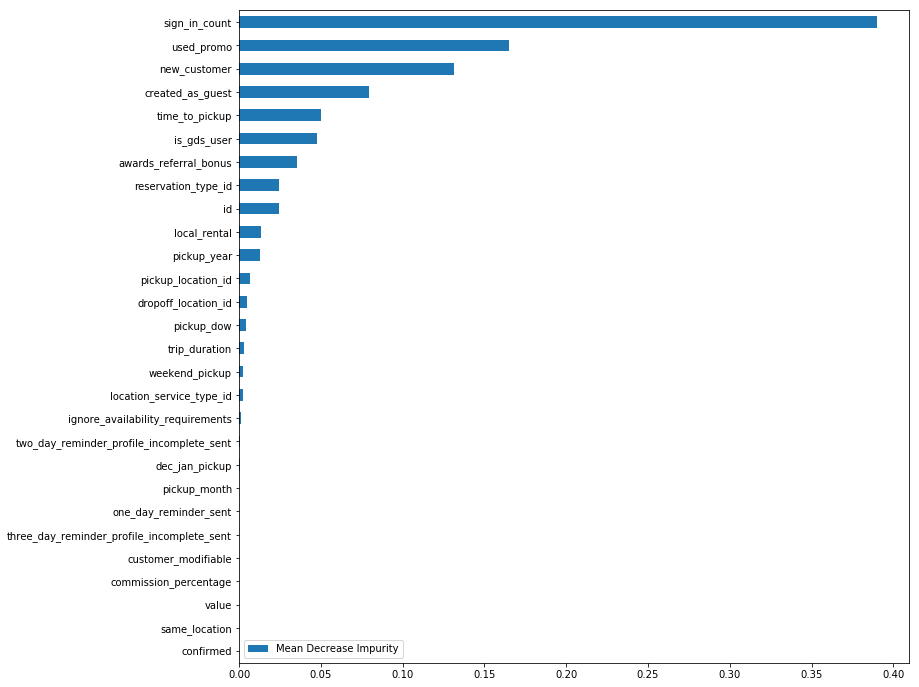

In [142]:
feat_scores = pd.DataFrame({'Mean Decrease Impurity' : rf.feature_importances_},
                           index=df_model.columns)
feat_scores = feat_scores.sort_values(by='Mean Decrease Impurity')
feat_scores.plot(kind='barh', figsize=(12,12))

In [127]:
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.05)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [128]:
gbc.score(X_test, y_test)

0.80256386437529026